# Principal Component Analysis (PCA)

## Ressources:

https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c : quick intro

http://setosa.io/ev/principal-component-analysis/: visualization

https://www.youtube.com/watch?v=PFDu9oVAE-g&t=583s: eigenvector & eigenvalue video (3blue1brown)

https://cseweb.ucsd.edu/~dasgupta/291-unsup/lec7.pdf: eigen value & vector math course

http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf : PCA course with math refresh **

https://github.com/llSourcell/Dimensionality_Reduction/blob/master/principal_component_analysis.ipynb : Siraj PCA notebook 



In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Intro

PCA is a widely used dimensionality reduction technique. Having too many features can lead to overly complex models which in turn can lead to overfitting. When dealing with high dimensional data, PCA can give us a better understanding of that data in order to devise a much more appropriate model for our data which should restrict the possibility of overfiting.

There are 2 big ways to go about dimensionality reduction:

1) feature extraction, creating one variable from others which is a combination of the others (we lose less data then the other technique)

2) feature elimination, downright removeing variables

PCA falls into the former category, we may be removing some dimensions, but we are removing the onces which have the least amount of variance. PCA also has the consequence of removing the overal information contained in the data but this is an expected cconsequence of dimensionality reduction techniques. However, the loss to data is minimal as we drop the principal component(s) with the least amount of variance (where the data fluctuates the least and contributes little to the data interpretability)



# Synthetic data 

First we will apply this technique to synthetic data. This is only 2 dimensional data but it will give us good opportunities to graph and display the transformations that we are doing on the data

## reading the data

In [2]:
data_file = "data_pca.txt"
data_dir = "Data/"

data = np.loadtxt(data_dir+data_file)
o_data = data
print(data.shape)

(50, 2)


### graphing the data
By graphing the data, we can get a first grasp of what kinds of things PCA will do to our data in order to reduce its dimensionality


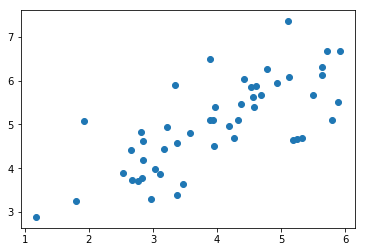

In [3]:
plt.scatter(data.transpose()[0],data.transpose()[1])

We can tell that there is some corelation to this data. Indeed, the distribution of these points is not uniform, it looks more like a gaussian distribution.

### data pre processing
Before running the PCA algorithm we first need to do some pre processing on the data. We need to do this step for 2 things. First to make the algorithms later easier and also so that our data looks a little better.

1) first we center our data. We calculate the mean of our data and ceter it by making the mean our new origin. 

calculate mean : $\mu= \frac{\sum_{i=1}^{I} x_i}{I}$ where I is the number of samples and x our data points

center variable $x = x-\mu$

2) normalize/standardize data

This step is also important. In our data, we are bound to have values which are in completely different orders of magnitude which will influence the variance of that data. To counter this bias towards data that is already expressed in large quantities we will standardize this data by dividing it by the variance

we may leave this second step out of our algorithm but it can be important

### centering around the mean


[3.989264 5.002806]


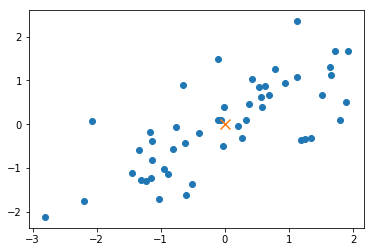

In [4]:
original_mean = data.mean(axis=0)
print(original_mean)

data = data - original_mean
plt.scatter(data.transpose()[0],data.transpose()[1])
plt.scatter(0,0,s=100,marker='x') # mean ==> origin(0,0)

### normalizing

We will leave this step out for our example

### calculating covariance matrix

The variance shoud be the diagonal values in our covariance matrix


In [5]:
var = np.var(data,axis=0)
print(var)

cov = np.cov(data.transpose())
print(cov)

[1.34854348 1.02642386]
[[1.37606477 0.88301454]
 [0.88301454 1.04737128]]


### Caluclating the eigenvector and eigenvalues of the covariance matrix

Since the covariance matrix is a square matrix, we can go ahead and calculate the eigen vector and values of this matrix.

Here, we are obtaining the eigen values from the covariance matrix but it could have also been found by doing SVD

In [6]:
eigVal,eigVect = np.linalg.eig(cov)

print(eigVal)
print(eigVect)

[2.10989648 0.31353957]
[[ 0.76908317 -0.63914872]
 [ 0.63914872  0.76908317]]


### Plotting this 

https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib

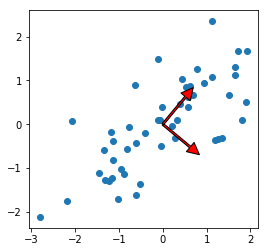

In [7]:

fig, ax = plt.subplots()
ax.scatter(data.transpose()[0],data.transpose()[1])
mu = data.mean(axis=0)
sigma = data.std(axis=0).mean()

for axis in eigVect:
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

### projecting data

we are projecting the data on the axes provided by the eigenvectors, once we do it we obtain a graph where the data seems flatter than before. This is normal because it is projected onto the vectors which serve as our orthogonal basis vectors for the data.

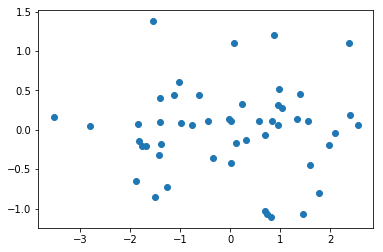

In [8]:
proj_data = np.dot(data,eigVect)

plt.scatter(proj_data.transpose()[0],proj_data.transpose()[1])


From this data we can observe where the most variance happens. it looks like it is accross the X-axis which corresponds to the first eigenvector. On the other hand, the Y axis has a much lower variance. 

This fact is reflected when we look at the eigenvalues for this data. Indeed, the first eigenvalue (X-axis) is the highest which indicates that this is the principal component as it has the highest amount of variance.

### Finding our principal components

by sorting our eigenvalues in descending order, we will get which eigenvector has the most corresponding variance and therefore effect on the 'meaning' of our data. Since our goal is dimensionality reduction, we sort the eigenvalues in order to then be able to drop some of our principal components. This will result in a loss of information but that loss will be minimal as we are chosing to drop the principal components that have the least amount of variance on the data.

Eigenvectors are supposed to have a norm of one like we would usually get from basis vectors

In [9]:
for ev in eigVect:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')


Everything ok!


First, we need to sort our eigenvalues in descending order. Then we just keep the p vectors that we want to keep in our hyperplane composed of those p principal components.

In [10]:
eigen_pairs = [(eigVal[i],eigVect[:,i]) for i in range(len(eigVal))] # stores eigen value & vector pairs

eigen_pairs.sort(key=lambda x: x[0], reverse = True) # sorts in descending order

for eig in eigen_pairs:
    print(eig)

(2.109896480948542, array([0.76908317, 0.63914872]))
(0.3135395738147232, array([-0.63914872,  0.76908317]))


Now that we have our sorted eigen pairs, we now have our true principal components. In this manner, principal component 1 should be responsible for the most variance in the data. It is from these eigen pairs, that we will be chosing which principal components to keep.

we can see this fact by observing by how much each principal component contributes to the overall variance in the data

Text(0.5, 0, 'Principal components')

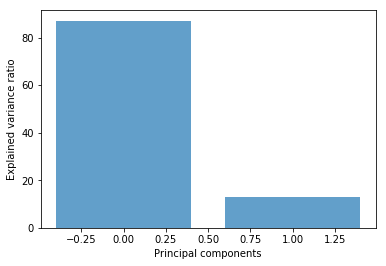

In [11]:
tot_var = sum(eigVal) 
pca_var = [(val/tot_var)*100 for val in sorted(eigVal,reverse=True)]

plt.bar(range(len(eigVal)), pca_var,align='center',alpha=0.7)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

#### We can read the bar graph above as:

Principal component 0 contributes to over 80% of the variance in the data while principal component 1 contributes to less than 20% of variance.

So while both of these principal components carry some information, PC0 explains variation in the data 4 times better than its conterpart PC1. Of course here we only have 2 dimensions but this case may become clearer with higher dimensional data where certain principal components have no measurable impact on the variation of our data.

This does not mean that a certain feature is useless though! PCA maps our data onto another space, that of the principal components. So a useless principal component does not mean that part of our data is useless. Instead, it means that in our PCA space, we can remove some of our principal components with a minimal loss of information to our data. We can then map our data back to our original space with no real issue.


### Projecting data onto our new hyperplane

Now that we have our sorted eigenvalues and we have explained a little the principles behind PCA we can now get to the interesting part where we will project our data into the new hyperplane.

Here we only had 2 dimensions so our only real choice is to reduce that to 1 dimension.

We start this out by creating a matrix that is composed of p sorted eigenvectors. 

In [12]:
p = 1
n = len(eigVal)
print(n)

if p < n:
    
    pca_mat = np.array([eigen_pairs[i][1] for i in range(p)])
    
else:
    print("dimensions mismatch, cant reduce data to more dimensions")
    
    
print(pca_mat)

2
[[0.76908317 0.63914872]]


Projecting our data simply comes down to performing the dot product between our data points and the PCA transformation matrix which we created above.

In [13]:
Y = np.dot(data, pca_mat.transpose())

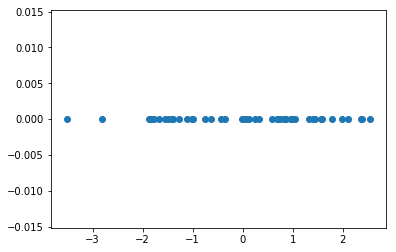

In [14]:
plt.scatter(Y,np.zeros(Y.shape))

It is clear now that this is the data that we just had before but squished down to a single dimension. By doing this we have lost some of the original information that was contained in our data but because of the way that we did this, we have essentially preserved as much information as possible by using PCA.

### plotting reduced data back onto original space
Since we reduced the number of dimensions, projecting back onto the original space will result in a loss of information. This loss is due to the fact that we reduced the number of eigenvectors that we would be projecting our data back on.

The formulat to get the graph above is
$$ \tilde{Y}= \tilde{X} u^T $$

where:

$\tilde{X}$: processed data (mean removed and possibly divided by variance)

$\tilde{Y}$: processed data that has been projected onto our hyperplane

$u^T$: transpose of our principal components that we kept in our final hyperplane

in order to get back to our original X, with some information loss of course we just move around the terms of the equation to get
$$ \tilde{X} = u^{-1}  \tilde{Y}$$

Where $ u^{-1}$ is the inverse of our eigen vector matrix that we use to map data onto the hyperplane. However, since all of the elements of the matrix are unit eigenvectors of our data. It turns out that the inverse of our eigen vector matrix is equal to its transpose. Therefore our equation becomes:

$$ \tilde{X} = u^{T}  \tilde{Y^T}$$

Finally, since we wish to get back to our original data we need to add the mean again that we removed before. This gives us the final equation

$$ X = (u^{T}  \tilde{Y^T}) + \mu$$

In [15]:
processed_original_data = np.dot(pca_mat.transpose(),Y.transpose())

original_data = processed_original_data + original_mean.reshape((2,1))

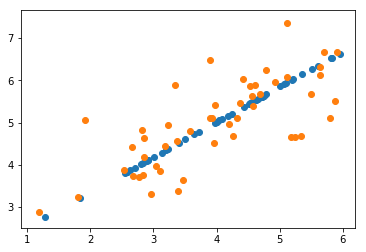

In [16]:

plt.scatter(original_data[0],original_data[1])
plt.scatter(o_data.transpose()[0],o_data.transpose()[1])

## Working with real-life data



In [17]:
file_name="diabetes.csv"
data_dir="Data/"

data = np.loadtxt(open(data_dir+file_name, "rb"), delimiter=",", skiprows=1)
pd_data = pd.read_csv(data_dir+file_name)

In [18]:
print(data.shape)

(768, 9)


In [19]:
pd_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
pd_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


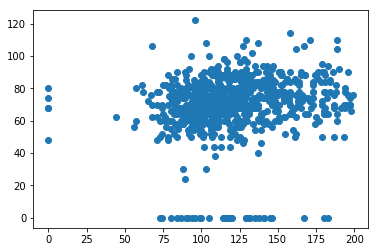

In [21]:
plt.scatter(pd_data["Glucose"],pd_data["BloodPressure"])

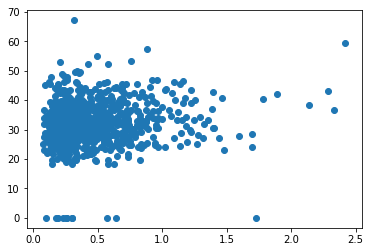

In [22]:
plt.scatter(pd_data["DiabetesPedigreeFunction"],pd_data["BMI"])

Like before, we will perform the same types of operations on the data in order to perform PCA. This time, we have a lot more dimensions to work with meaning that we should get some more interesting results in terms of dimensionality reduction.

### Data pre processing:

Like before, we will be centering data along the mean. To do this we subtract the mean from each point.

Next thing we can do is divide by the variance, this is so that we get a normal distribution with mean 0 and std 1

We will also drop the last column as it is a target and not a feature. It will be usefull later to check if PCA worked properly

In [23]:
x = data.transpose()[:-1].transpose()
target = data.transpose()[-1].transpose()


print(x.shape)
print(target.shape)

(768, 8)
(768,)


In [24]:
data_mean = x.mean(axis=0)

print(data_mean)

[  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542]


In [25]:
x_centered = x - data_mean

### Calculating the covariance matrix

In [26]:
var = x.var(axis=0)

cov = np.cov(x.transpose())
print(cov)

[[ 1.13540563e+01  1.39471307e+01  9.21453818e+00 -4.39004101e+00
  -2.85552307e+01  4.69774181e-01 -3.74259714e-02  2.15706198e+01]
 [ 1.39471307e+01  1.02224831e+03  9.44309556e+01  2.92391827e+01
   1.22093580e+03  5.57269867e+01  1.45487481e+00  9.90828054e+01]
 [ 9.21453818e+00  9.44309556e+01  3.74647271e+02  6.40293962e+01
   1.98378412e+02  4.30046951e+01  2.64637574e-01  5.45234528e+01]
 [-4.39004101e+00  2.92391827e+01  6.40293962e+01  2.54473245e+02
   8.02979941e+02  4.93738694e+01  9.72135546e-01 -2.13810232e+01]
 [-2.85552307e+01  1.22093580e+03  1.98378412e+02  8.02979941e+02
   1.32811801e+04  1.79775172e+02  7.06668051e+00 -5.71432903e+01]
 [ 4.69774181e-01  5.57269867e+01  4.30046951e+01  4.93738694e+01
   1.79775172e+02  6.21599840e+01  3.67404687e-01  3.36032992e+00]
 [-3.74259714e-02  1.45487481e+00  2.64637574e-01  9.72135546e-01
   7.06668051e+00  3.67404687e-01  1.09778638e-01  1.30771687e-01]
 [ 2.15706198e+01  9.90828054e+01  5.45234528e+01 -2.13810232e+01
  -

### Deriving the eigen vector and values from the covariance matrix

In [27]:
eigVal,eigVect = np.linalg.eig(cov)

### Sorting eigen pairs by eigen value in descending order

In [28]:
eigen_pairs = [(eigVal[i],eigVect[:,i]) for i in range(len(eigVal))] # stores eigen value & vector pairs

eigen_pairs.sort(key=lambda x: x[0], reverse = True) # sorts in descending order with key as eigen val (first item [0])


Text(0.5, 0, 'Principal components')

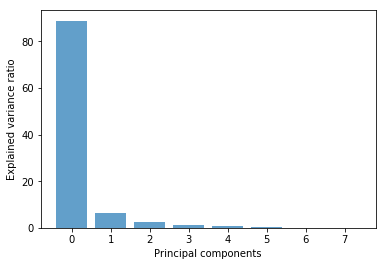

In [29]:
tot_var = sum(eigVal) 
pca_var = [(val/tot_var)*100 for val in sorted(eigVal,reverse=True)]

plt.bar(range(len(eigVal)), pca_var,align='center',alpha=0.7)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

It is clear here that there are some principal components which have very little influence over the variation in the data. This is good as it will allow us to greatly reduce the amount of dimentions for this dataset.

Looking at the graph above, we can reduce down to 2 dimensions with very little loss of information

### Selecting our princial components to create our hyperplane

In [30]:
p = 3
n = x.shape[1]

if p <= n:
    
    pca_mat = np.array([eigen_pairs[i][1] for i in range(p)])
else:
    print("dimension mismatch")

In [31]:
print(pca_mat)
print(eigen_pairs)

[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [ 2.26488861e-02  9.72210040e-01  1.41909330e-01 -5.78614699e-02
  -9.46266913e-02  4.69729766e-02  8.16804621e-04  1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]
[(13456.572981016574, array([-2.02176587e-03,  9.78115765e-02,  1.60930503e-02,  6.07566861e-02,
        9.93110844e-01,  1.40108085e-02,  5.37167919e-04, -3.56474430e-03])), (932.7601323145335, array([ 2.26488861e-02,  9.72210040e-01,  1.41909330e-01, -5.78614699e-02,
       -9.46266913e-02,  4.69729766e-02,  8.16804621e-04,  1.40168181e-01])), (390.5778311459803, array([-2.24649003e-02,  1.43428710e-01, -9.22467192e-01, -3.07013055e-01,
        2.09773019e-02, -1.32444542e-01, -6.39983017e-04, -1.25454310e-01])), (198.18269105319072, array([-0.04904596,  0.11983002, -0.26274279,  0.88436938,

### Projecting our processed data onto this hyperplane

Like we explained above, the formula for projecting onto our hyperplane containing the p principal components we use:
$$ \tilde{Y}= \tilde{X}\cdot u^T $$


In [32]:
Y = np.dot(x_centered,pca_mat.transpose())

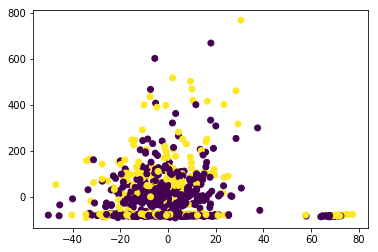

In [33]:
plt.scatter(Y.transpose()[2],Y.transpose()[0], c= target )

https://matplotlib.org/2.1.1/gallery/mplot3d/scatter3d.html : for making 3d scatter plots

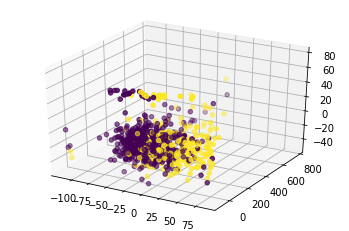

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y.transpose()[1],Y.transpose()[0],Y.transpose()[2], c=target)

Finally, to get back to our original data we will use the equation:

$$ X = (u^{T} \cdot \tilde{Y^T}) + \mu$$

In [35]:
x_orig = np.dot(pca_mat.transpose(),Y.transpose()) + data_mean.reshape(8,1)

In [36]:
print(x_orig.shape)

(8, 768)


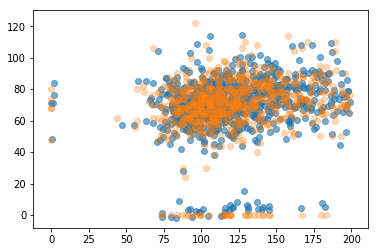

In [37]:
plt.scatter(x_orig[1],x_orig[2],alpha=0.6)
plt.scatter(x.transpose()[1],x.transpose()[2],alpha=0.3)

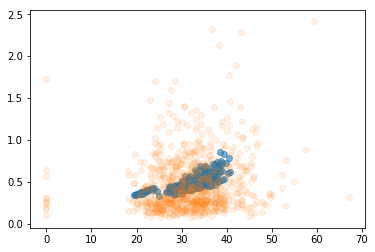

In [38]:
plt.scatter(x_orig[5],x_orig[6],alpha=0.6)
plt.scatter(x.transpose()[5],x.transpose()[6],alpha=0.1)

In [40]:
print(x_orig.transpose()[0])
print(x[0])
print(Y[0])

[  4.97548747 147.39906774  79.68658009  16.08527869   1.05221896
  33.58212174   0.46521637  39.46084188]
[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
[-75.71465491  35.95078264  -7.26078895]
